<a href="https://colab.research.google.com/github/vighnesh-a-k/pneumonia-detection/blob/master/deeplearning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (3).json
User uploaded file "kaggle.json" with length 66 bytes


In [ ]:
import os

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"]="/content"

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/chest-xray-pneumonia.zip


Archive:  /content/chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace chest_xray/__MACOSX/chest_xray/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace chest_xray/__MACOSX/chest_xray/._test? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score


from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import  Conv2D
from keras.layers import  Flatten
from keras.layers import  Dense


In [ ]:
input_path = './chest_xray/'


In [ ]:
batch_size = 8
EPOCHS = 20
image_dims = 512
AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(10)

In [ ]:
training_data_generator = ImageDataGenerator(rescale = 1./255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip= True)
training_gen = training_data_generator.flow_from_directory(directory=input_path+'train',
target_size=(image_dims,image_dims),
                             batch_size=batch_size,
                             class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
validation_data_generator = ImageDataGenerator(rescale= 1./255)
validation_gen = validation_data_generator.flow_from_directory(directory= input_path+ 'val',
                             target_size=(image_dims,image_dims),
                             batch_size= batch_size,
                             class_mode= 'binary')

Found 16 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(64 , (3,3) , activation = 'relu' , input_shape= (image_dims, image_dims, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs = 10
history = model.fit_generator(training_gen,
             steps_per_epoch= 10,
             epochs = epochs,
             validation_data=validation_gen,
             validation_steps= validation_gen.samples)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
10/10 [==============================] - 62s 6s/step - loss: 1.5990 - accuracy: 0.5875 - val_loss: 0.7955 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 60s 6s/step - loss: 0.6020 - accuracy: 0.7125
Epoch 3/10
10/10 [==============================] - 57s 6s/step - loss: 0.6082 - accuracy: 0.6750
Epoch 4/10
10/10 [==============================] - 56s 6s/step - loss: 0.5065 - accuracy: 0.8375
Epoch 5/10
10/10 [==============================] - 58s 6s/step - loss: 0.5844 - accuracy: 0.7625
Epoch 6/10
10/10 [==============================] - 56s 6s/step - loss: 0.5145 - accuracy: 0.7875
Epoch 7/10
10/10 [==============================] - 71s 7s/step - loss: 0.8183 - accuracy: 0.5125
Epoch 8/10
10/10 [==============================] - 56s 6s/step - loss: 0.6895 - accuracy: 0.7625
Epoch 9/10
10/10 [==============================] - 56s 6s/step - loss: 0.6850 - accuracy: 0.8375
Epoch 10/10
10/10 [==============================] - 58s 6s/step - loss: 0.6

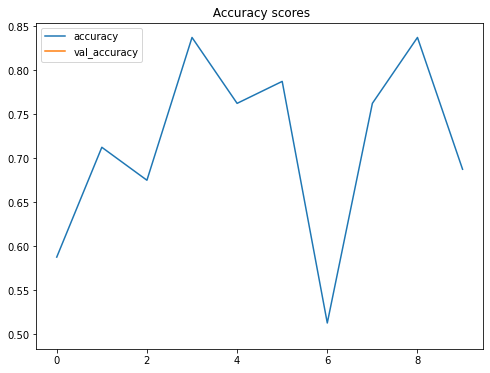

In [ ]:
plt.figure(figsize=(8,6))
plt.title(' Accuracy scores')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()



In [ ]:
test_data_generator = ImageDataGenerator(rescale = 1/255)

test_gen = test_data_generator.flow_from_directory(directory = input_path + 'test',
  target_size = (image_dims, image_dims),
  batch_size = 128,
  class_mode = 'binary'
)

eval_result = model.evaluate_generator(test_gen, 624)
print('loss rate at evaluation data :', eval_result[0])
print('accuracy rate at evaluation data :', eval_result[1])

NameError: ignored